# Team Members

- Kyle Hwang (ksh6947)
- Michael Lin (qlb968)
- Dylan Wu (dwg0364)

# Abstract

Our final project seeks to use `pytorch` to replicate the "Attention is All You Need" paper, which introduced the Transformer as a way to improve upon existing sequence transduction language models. We will attempt to implement the model's architecture and train the model on a subset of the WMT 2014 English-French and English-German datasets. We will then perform analyses on the training and validation results.


# Code for Plots


In [3]:
import json
import matplotlib.pyplot as plt


def plot_loss_and_bleu_scores(file_name):
    with open(file_name) as f:
        data = json.load(f)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f"Loss and BLEU Score")
    fig.set_size_inches(8, 4)
    ax1.plot(data["train_losses"], label="Train")
    ax1.plot(data["validation_losses"], label="Validation")
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.legend()

    ax2.plot(data["train_bleu_scores"], label="Train")
    ax2.plot(data["validation_bleu_scores"], label="Validation")
    ax2.set(xlabel="Epoch", ylabel="BLEU Score")
    ax2.legend()

# Goals and Discussion

## Essential Goals

- Have a complete neural network that runs without error. Additionally, to make sure we understand the impact of tuning hyperparameters, we will analyze the effects of varying hyperparameters on the trained model's BLEU score (keeping the number of epochs fixed).

> This was mostly completed. However, we did initially encounter issues with training a model based on the paper's original architecture (see discussion in "Everything Else"). As a result, we modified the architecture by removing the final linear layer in the decoder and the subsequent softmax. We also trained the model with Cross Entropy Loss in the embedding space instead of the token space. While tuning hyperparameters would be an interesting exercise, we decided there were more interesting goals to attain (e.g., training the model with a different language pair to assess if the performance is comparable) and did not end up analyzing the impact of training with different hyperparameters.

- Generally, as we train the model for longer, the BLEU score should be increasing (we will include a chart to show this).

> The BLEU score indeed increased as we trained the model for longer. Below are the plots for Cross Entropy Loss and BLEU for French-to-English translation trained with 1,000 examples, batch size of 100, sequence length of 50, and 25 epochs. As can be seen in the plots, the model performs remarkably well after only 25 epochs of training, achieving a BLEU score of over 0.9.


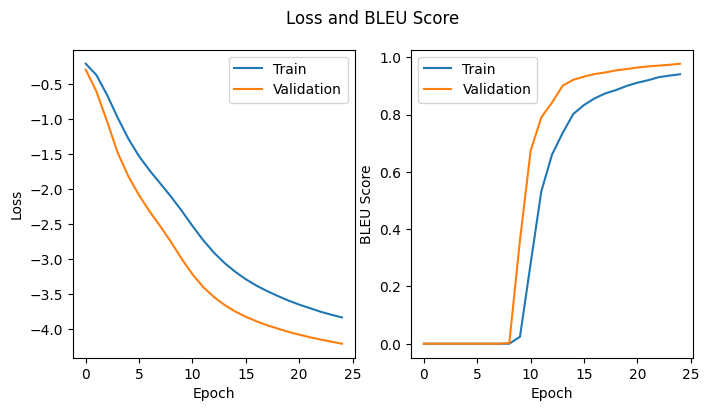

In [8]:
plot_loss_and_bleu_scores(
    "models/20230608_022058_fr-en_N1000_B100_L50_E25/epoch_25_losses.json"
)

> As an example, we translated the following French sentence (from the training set) to English:
>
> - Input in French: `<s>et d' ailleurs, certains états membres ne sont pas préparés à la mobilité. </s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s>`
> - Target translation in English: `[CLS] and indeed, some member states are not geared for mobility. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
>
> After 25 epochs, we achieved a perfect translation for this training example:
>
> - Model translation in English: `[CLS] and indeed, some member states are not geared for mobility. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
>
> To validate the model, we also translated the following French sentence (from the validation set) to English:
>
> - Input in French: `<s>par conséquent, dès qu' un officiel u.s. formule la moindre critique à l' égard du mexique, vous commencez à entendre -- dans la presse mexicaine, et parmi les élites -- des plaintes sur la façon dont les américains portent atteinte à la souveraineté de leur voisin`
> - Target translation in English: `[CLS] so the minute that a u. s. official says anything the least bit critical of mexico, you start hearing - - in the mexican press, and among the elites - - complaints about how the americans are encroaching upon their neighbor '`
>
> Again, after training for 25 epochs, we achieved a near-perfect translation for this validation example:
>
> - Model translation in English: `[CLS] so the minute that a u. s. official says anything the least bit critical of mexico, you start hearing - - in the mexican press, and - the elites - - complaints about how the americans are thecr to the upon their [PAD] [PAD]`


## Desired Goals

- Achieve results of translation that is not simply mappings between the two language vocabularies but rather encompasses the context and attention mappings of the whole sentence. This could be achieved by inputting examples where gendered noun and adjective would be correctly translated (i.e., the Transformer can differentiate between genders).

  - "I am a tall man" vs. "I am a tall woman"

> We were not able to implement a way to directly test it, but based off of sample outputs that we print out when training, we find that the model is able to match with the true translation despite having gendered words in them, so we are led to assume that this goal has been achieved.

- Have consistency across languages when training under the same model in terms of BLEU score. Testing with another language dataset and have a similar BLEU score performance under the same training settings and time.

> We trained the model again with the same parameters (i.e., 1,000 examples, batch size of 100, sequence length of 50, and 25 epochs) but translating German-to-English. The Cross Entropy Loss and BLEU score followed a similar pattern.


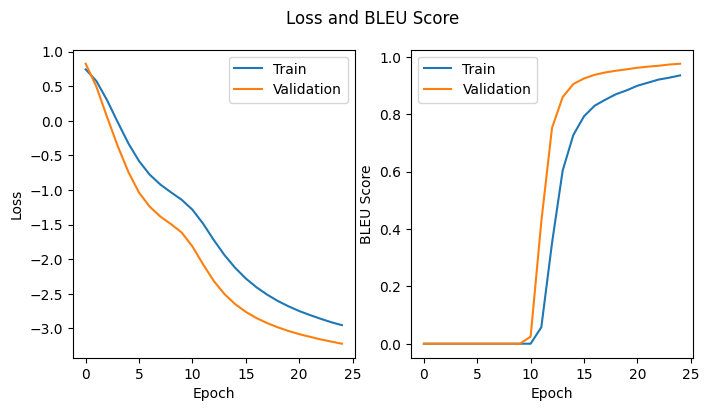

In [9]:
plot_loss_and_bleu_scores(
    "models/20230608_024909_de-en_N1000_B100_L50_E25/epoch_25_losses.json"
)

> As an example, we translated the following German sentence (from the training set) to English:
>
> - Input in German: `[CLS] im ubrigen wurde diese angelegenheit seinerzeit mehrfach vorgetragen und erortert. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
> - Target translation in English: `[CLS] as a matter of fact, at the last conference, this issue was raised and discussed on several occasions. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
>
> After 25 epochs, we achieved a perfect translation for this training example:
>
> - Model translation in English: `[CLS] as a matter of fact, at the last conference, this issue was raised and discussed on several occasions. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
>
> To validate the model, we also translated the following German sentence (from the validation set) to English:
>
> - Input in German: `[CLS] es muss empfanglich fur verschiedenste nachbarn und meinungen sein und das ist nicht einfach. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
> - Target translation in English: `[CLS] it must be receptive to the most diverse of neighbours and opinions, and this is not easy. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`
>
> Again, after training for 25 epochs, we achieved a perfect translation for this validation example:
>
> - Model translation in English: `[CLS] it must be receptive to the most diverse of neighbours and opinions, and this is not easy. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`


## Stretch Goals

- Based on the findings from the paper "Reformer: The Efficient Transformer", we would try to implement and quantify the impact of the suggested changes from that paper compared to the Transformer.

> Unfortunately, we were not able to complete creating the Transformer model with much time to spare, so we were forced to abandon this goal.

- Try pretraining the model on English-to-French, then fine tune the model to translate English-to-Spanish (the motivation is that since both French and Spanish are Romance languages, the pretrained model could have already learned important parts of the mapping from English to any Romance language).

> Unfortunately, we were not able to complete creating the Transformer model with much time to spare, so we were forced to abandon this goal.

## Everything Else

Initially, we tried using Cross Entropy Loss on the tokens (one-hot encoded target and probability output), but we had trouble with the model learning anything useful; the loss did not decrease much. By tinkering around, we ended up using Cross Entropy Loss in the embedding space of the model. However, using intuition on how Cross Entropy Loss is supposed to work, this approach doesn't make too much sense, but empirically speaking, it ended up performing extremely (and somewhat surprisingly) well. It is surprising because we are treating the embedding space as a probability space when we use Cross Entropy Loss, which doesn't make too much sense.

As such, we also tried using Mean Squared Error Loss in the embedding space; we essentially want to minimize the distance between the target embedding and the output embedding. Training the model with Mean Squared Error Loss in the embedding space (keeping all other hyperparamaters fixed) performs comparable to Cross Entropy Loss (see plot below). As an example, we translated the following French sentence (from the training set) to English:

- Input in French: `<s>cela ne sert à rien d' arrêter un nouveau calendrier économique et social si l' on n' a pas épuisé l' ancien. </s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s><s>`
- Target translation in English: `[CLS] there is no point in drawing up a new economic and social agenda if you have not even finished the old one. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`

After 25 epochs, we achieved a perfect translation for this training example.

- Model translation in English: `[CLS] there is no point in drawing up a new economic and social agenda if you have not even finished the old one. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`

To validate the model, we also translated the following French sentence (from the validation set) to English:

- Input in French: `<s>" depuis le début de l' enquête en 2010, souligne-t-il, le seul ministère des transports aurait épargné un milliard de dollars sur les contrats ", certains réfrénant leurs instincts pour toucher une quote-part! </s><s><s><s><s><s><s><s><s><s>`
- Target translation in English: `[CLS] " since the inquiry opened in 2010, he says, the ministry of transport alone reportedly saved a billion dollars on contracts, " with certain people curbing their instincts to get a share! [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`

Again, after training for 25 epochs, we achieved a perfect translation for this validation example.

- Model translation in English: `[CLS] " since the inquiry opened in 2010, he says, the ministry of transport alone reportedly saved a billion dollars on contracts, " with certain people curbing their instincts to get a share! [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]`

Below is a plot of training and validation Mean Squared Error Loss and BLEU score over 25 epochs.


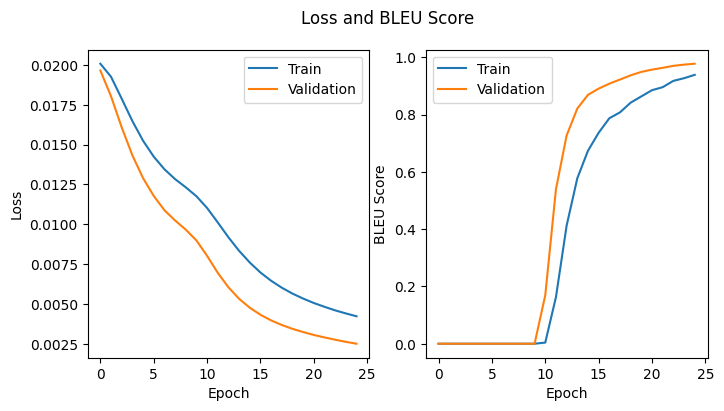

In [5]:
plot_loss_and_bleu_scores(
    "models/20230608_015040_fr-en_N1000_B100_L50_E25_MSE/epoch_25_losses.json"
)

What was also interesting with every validation we performed was that it actually outperformed the training loss and BLEU score. This points to potential issues with the model specification and possibly bugs with the training and validation code. To that end, we did try looking for bugs, specifically whether or not we implemented the Transformer as stated in the paper, as well as whether we training and validated the model correctly. To our knowledge, we were not able to identify any differences other than the inputs to the Cross Entropy Loss or any bugs.


# Code and Documentation

Here are the 10 most important files in our code base. In addition, we wrote several unit tests as we developed the model (run them with the command `python -m pytest`).

## `data.py`

This contains classes that processes our data in the format we desire. This is relevant as it makes using our data easier. This includes the preprocessing of our data to a format that could be fit into the transformer model. This also includes the tokenization and padding of the initial text data into a tokenized list of a specified sequence length.

## `decoder.py`

This contains the decoder portion of the Transformer model as well as each individual decoder layer. This is what processes the outputs of the encoder and the previous output tokens to obtain the most likely next translated word.

## `encoder.py`

This contains the encoder portion of the Transformer model as well as each individual encoder layer. This is what processes the tokenized input using positional encoding, Multiheaded Attention, and feed-forward neural networks. This output is then fed as a type of encoded information to the decoder.

## `multihead_attention.py`

This contains the Multi-Head Attention portion of the Transformer model, present in both the encoder and the decoder. This is what makes it possible to capture information from an input. This includes the self-attention mechanism and the weights to compute Q, K, V from the embedded inputs with positional encoding.

## `optimizer.py`

This contains a specific implementation of the Adam optimizer that dynamically changes the learning rate as learning progresses. This is relevant as this is what the paper used, and it is respectively used to optimize our model.

## `position_wise_feed_forward.py`

This is the position-wise feed-forward neural network that is used in the encoder and decoder and contains two fully connected linear layers with a ReLU activation in between.

## `positional_encoder.py`

This contains our `PositionalEncoding` class. This is required as this is how the Transformer understands the positions of the inputs, something that is naturally included in an LSTM but excluded in the Transformer since it opts to use the self-attention mechanism to encode context.

## `transformer_runner.py`

This contains the runner of the model. This is how the model is run by using the trainer in `transformer_trainer.py`. This includes loading the data, initializing the model and passing the parameters to the trainer to train.

The trained models are too large for Github; we have uploaded them to Google Drive: https://drive.google.com/drive/u/1/folders/15OVQVdBQq6nhpLdGxMfCwee6d8ZQRRqr

The commands we used to run the our experiments are as follows:

- French-to-English (with Cross Entropy Loss)
  - `python -m src.transformer_runner.py 1000 100 50 25 1 fr-en cross_entropy`
  - See "20230608_022058_fr-en_N1000_B100_L50_E25" folder in the Google Drive for the trained model
- German-to-English (with Cross Entropy Loss)
  - `python -m src.transformer_runner.py 1000 100 50 25 1 de-en cross_entropy`
  - See "20230608_024909_de-en_N1000_B100_L50_E25" folder in the Google Drive for the trained model
- French-to-English (with Mean Squared Error Loss)
  - `python -m src.transformer_runner.py 1000 100 50 25 1 fr-en mse`
  - See "20230608_015040_fr-en_N1000_B100_L50_E25_MSE" folder in the Google Drive for the trained model

## `transformer_trainer.py`

This contains the trainer of the model. This is how the model gets trained, loss gets calculated and models stored to the local storage.

## `transformer.py`

This contains the Transformer model, which pretty much puts everything together. This is the end goal of the project, which is creating a Transformer model, including everything from the embedding, positional encoding, self-attention, multihead attention, encoder and decoder. This is the model that we used in the trainer to train for a translation task.


# Reflections

## What was interesting?

Despite having a way smaller dataset then the one used in the actual paper, we were able to see the model converge and output translations similar to or the same as the target. This is exciting and interesting as one of the largest concerns we had early on in the project was that we would not be able to see much results based on the limitations of computational power as well as the amount of data we are using. While we encountered theoretical issues with using Cross Entropy Loss in the embedding space, re-training of the model with Mean Squared Error Loss that yielded similar performance convinced us that the model was generally sound.

Just as important for our learning was the implementation itself. While the homework assignments from class helped us put theory into practice, implementing an entire model from scratch meant we had to think like machine learning engineers: writing a clean codebase, documenting assumptions, writing automated tests, and managing the training and validation datasets. This was a huge undertaking that ended up being both challenging and rewarding.

## What was difficult?

The most frustrating part of this project was properly aligning all the components and figuring out why certain components do not behavior as expected. When first starting the project, it was pretty simple: we would work on our respective tasks, each implementing an individual part of the Transformer model. But later on in the process, we ran into many difficulties in putting everything together: dimensions not matching, issues with ensuring the data and model were both on the GPU, etc. In fact, developing the code for the individual components took around 2 weeks, but the rest of the time was spent on alignment and tweaking initial misinterpretations we had of the model's architecture as described in the paper.

Another difficulty was one common in large model: time. In order to see if our model was really learning anything, we would have to let it train, and only then could we see the results.

For anyone else who might want to implement a paper from scratch, we would encourage them to try to truly understand the nuances of the models so that they would be able to have a more direct and clear path towards the end. We would also encourage them to invest time early in basic MLOps/DevOps processes such as programmatically pushing code directly to the Deep Learning Virtual Machine, regularly saving out model checkpoints in case the Virtual Machine instance goes to sleep, making the runner much more flexible for running different experiments directly from the command line (i.e., don't have to change code anytime we want to train the model with different hyperparameters), etc.

## What's left to do?

We believe that there are still more tweaks to be made in order for this model to truly work as it should, so that would be the initial work that we would get done (particularly return to the original architecture of the paper and try to understand why our first-attempt did not work). Next, as we were unfortunately unable to accomplish our stretch goals, we would then look into those. Then, we would retrain the model with less reliance on the target data (i.e., introduce a Teacher Forcing hyperparameter), which would help reduce the risk of overfitting. Finally, we would train the tokenizer itself, as done by the authors of the paper, instead of using pre-trained tokenizers (we suspect our surprisingly good results are partly due to the well-pre-trained tokenizers).

A million dollars would go a long way towards computational resources as well as human resources for strengthening our MLOps/DevOps capabilities. With faster training and more efficient development/deployment, we would be able to iterate and improve upon our model faster.


# References

> Vaswani, Ashish, et al. "Attention Is All You Need." ArXiv (2017): /abs/1706.03762.
